In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import os
import pdb
from astropy.table import QTable, Table
import astropy.units as u
import astropy.constants as const
from astropy.io import ascii
import math
import shutil
plt.rc('font', family='Computer Modern')
plt.rc('text',usetex=True)
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plot_dpi = 300

"""
TO DO:
-----
- create plots for eqorbmesc

"""

'\nTO DO:\n-----\n- create plots for eqorbmesc\n\n'

In [2]:
(1 * u.solMass).to(u.earthMass).value     

332946.07832806994

''

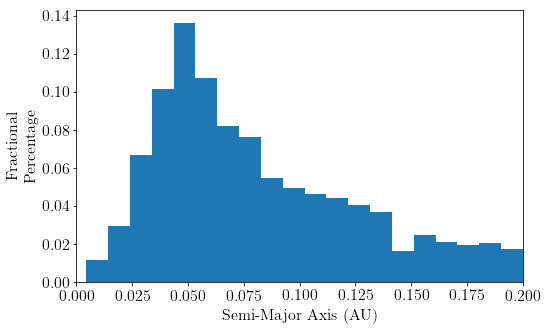

In [15]:
data = QTable.read('semi_lt_p2au.csv', format='ascii')
data = data['pl_orbsmax']
fig,ax = plt.subplots(1,1)
fig.set_size_inches(8,5)

ax.hist(data, bins=20, weights=np.zeros_like(data)+1./data.size)
ax.set_xlim(0,0.2)
ax.set_ylabel('Fractional\nPercentage', fontsize=16)
ax.set_xlabel('Semi-Major Axis (AU)', fontsize=16)
fig.savefig('./figs/3daypileup.png', bbox_inches='tight', dpi=plot_dpi)
;

In [3]:
eqonly_dir = './final_data/runs_eq_only/'
eqorb_dir = './final_data/runs_eqorb/'
eqorbmesc_dir = './final_data/runs_eqorbmesc/'
eqmesc_dir='./final_data/runs_eqmesc/'

# lets make a ecc distribution
probecc_data = QTable.read('probecc_comma.dat',format='ascii.no_header', names=['ecc','%inbin','cum%'])
planet_data = QTable.read('planets.csv',format='ascii')
rad_data = planet_data['pl_radj'] * (const.R_jup/const.R_earth)



def get_IC_data(n):
    '''
    n = sim number
    '''
    foldername = "%05i"%n
    folderdir = eqorb_dir + foldername
    b_file = open(folderdir + '/b.in','r')
    c_file = open(folderdir + '/c.in','r')
    star_file =open(folderdir + '/star.in','r')
    vpl_file = open(folderdir + '/vpl.in','r')
    b_content = b_file.read()
    c_content = c_file.read()
    star_content = star_file.read()
    vpl_content = vpl_file.read()
    b_content = b_content.split('\n')
    c_content = c_content.split('\n')
    star_content = star_content.split('\n')
    vpl_content = vpl_content.split('\n')
    
    b_ecc_line = 9
    c_ecc_line = 9
    b_rad_line = 5
    c_rad_line = 5
    b_semi_line = 10
    c_semi_line = 10
    b_mass_line = 4
    c_mass_line = 4
    
    b_ecc = b_content[b_ecc_line]
    c_ecc = c_content[c_ecc_line]
    b_ecc = float(b_ecc.split('\t\t')[1])
    c_ecc = float(c_ecc.split('\t\t')[1])
    
    b_rad = b_content[b_rad_line]
    c_rad = c_content[c_rad_line]
    b_rad = float(b_rad.split('\t\t')[1])*-1
    c_rad = float(c_rad.split('\t\t')[1])*-1
    
    b_semi = b_content[b_semi_line]
    c_semi = c_content[c_semi_line]
    b_semi = float(b_semi.split('\t\t')[1])
    c_semi = float(c_semi.split('\t\t')[1])
    
    b_mass = b_content[b_mass_line]
    c_mass = c_content[c_mass_line]
    b_mass = float(b_mass.split('\t\t')[1])*-1
    c_mass = float(c_mass.split('\t\t')[1])*-1
    
    # now to read in atmmassfrac
    print(foldername,end='\r')
    return b_ecc, c_ecc, b_rad, c_rad, b_semi, c_semi, b_mass, c_mass
    
i = 0
n = 25000
b_ecc_list = np.zeros(shape=(n))
c_ecc_list = np.zeros(shape=(n))
b_rad_list = np.zeros(shape=(n))
c_rad_list = np.zeros(shape=(n))
b_semi_list = np.zeros(shape=(n))
c_semi_list = np.zeros(shape=(n))
b_mass_list = np.zeros(shape=(n))
c_mass_list = np.zeros(shape=(n))

while i <= n-1:
    (b_ecc_list[i], c_ecc_list[i], b_rad_list[i], c_rad_list[i], b_semi_list[i], c_semi_list[i],
     b_mass_list[i], c_mass_list[i]) = get_IC_data(i)
    i += 1

    
# now we have the data
# so lets make it into a histogram and save that shit



''

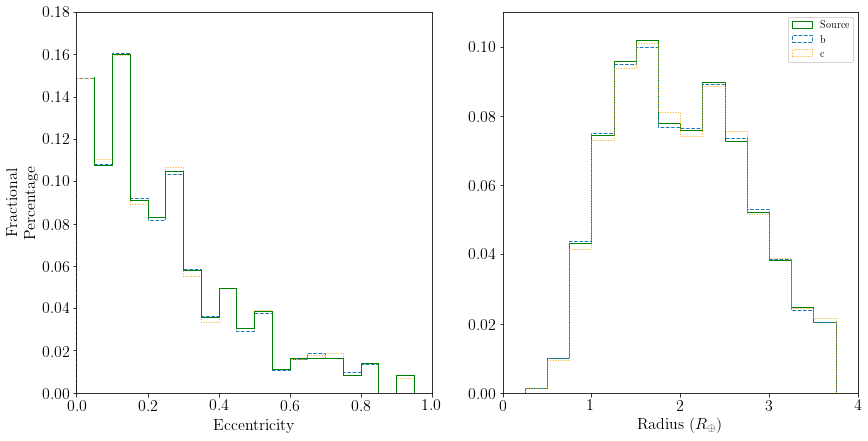

In [4]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(14,7)


x = np.arange(0,1,0.05)
y = probecc_data['cum%']
ecc_in_bin = probecc_data['%inbin']
z = probecc_data['ecc']
#z = z.insert(0,0)
#y = y.insert(0,y[0])
x_rad = np.arange(0,4,0.25)


#pdb.set_trace()
ax[0].set_xlabel('Eccentricity',fontsize=16)
ax[0].set_ylabel('Fractional\nPercentage', fontsize=16)
ax[0].step(z+0.05,ecc_in_bin, color='green',where='pre', lw=1, label='Source')
ax[0].set(ylim=(0,0.18), xlim=(0,1))
ax[0].hist(b_ecc_list,bins=x,weights=np.zeros_like(b_ecc_list)+1./b_ecc_list.size,histtype='step', label='b', ls='--')
ax[0].hist(c_ecc_list,bins=x,weights=np.zeros_like(c_ecc_list)+1./c_ecc_list.size,histtype='step',color='orange', label='c', ls=':')


ax[1].set_xlabel('Radius ($R_{\oplus}$)', fontsize=16)
rad_dist = ax[1].hist(rad_data,bins=x_rad,weights=np.zeros_like(rad_data)+1./rad_data.size,histtype='step', color='green', label='Source')
y_rad = rad_dist[0].cumsum()
rad_b_hist = ax[1].hist(b_rad_list,bins=x_rad,weights=np.zeros_like(b_rad_list)+1./b_rad_list.size,histtype='step', label = 'b', ls='--')
rad_c_hist = ax[1].hist(c_rad_list,bins=x_rad,weights=np.zeros_like(c_rad_list)+1./c_rad_list.size,histtype='step',color='orange', label='c',ls=':')
ax[1].legend(loc=0)
ax[1].set(xlim=(0,4),ylim=(0,0.11))
fig.savefig('./figs/ecc_rad_dist.png',bbox_inches='tight', dpi=plot_dpi)
;

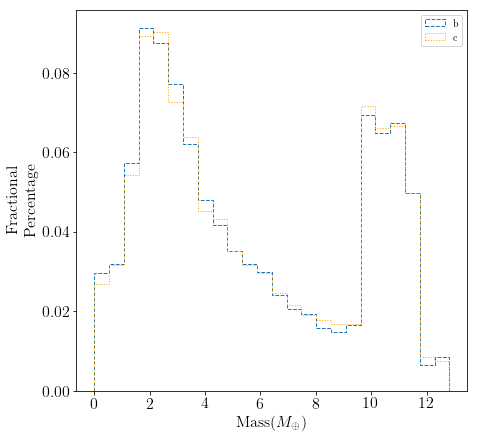

In [5]:
# now lets plot mass
fig,ax = plt.subplots(1,1)
fig.set_size_inches(7,7)

bins=24

ax.hist(b_mass_list, bins=bins, weights=np.zeros_like(b_mass_list)+1./b_mass_list.size, histtype='step', label='b',ls='--')
ax.hist(c_mass_list, bins=bins, weights=np.zeros_like(c_mass_list)+1./c_mass_list.size, color='orange', histtype='step',label='c', ls=':');
ax.legend(loc=0)
ax.set_xlabel("Mass($M_{\oplus}$)", fontsize=16)
ax.set_ylabel("Fractional\nPercentage",fontsize=16)
fig.savefig('./figs/mass_dist.png',bbox_inches='tight', dpi=plot_dpi)

In [6]:
def check_merge(log_dir):
    try:
        log_file = open(log_dir+"/log","r")
        log_content = log_file.readlines()
        merge_line = log_content[-3]
        if merge_line[:11] == "HALT: Merge":
            bMerge = 1
        else:
            bMerge = 0    
        return bMerge
    except FileNotFoundError:
        bMerge = -9999
        return bMerge
    except IndexError:
        bMerge = -9999
        return bMerge

def calc_strength(mass_star, mass_b, mass_c, semi_b, semi_c, ecc_b, ecc_c):
    # mass in units of earthmasses
    # semi in units of AU
    #mass_star = (mass_star *u.solMass).to(u.earthMass).value # solmass to earth mass
    mass_star = mass_star * u.M_sun
    G = const.G
    mass_b = mass_b * u.M_earth
    mass_c = mass_c * u.M_earth
    semi_b = semi_b * u.AU
    semi_c = semi_c * u.AU
    
    #G = (const.G.to(u.AU**3 / (u.earthMass*u.s**2))).value # to units fo AU^3/earthmass s^2
    n_b = np.sqrt(G*(mass_star + mass_b)/(semi_b**3))
    alpha = semi_c / semi_b
    strength = (mass_c/semi_b)* alpha**2 * ecc_b * ecc_c * (np.sqrt(1-ecc_b**2)/(n_b*semi_b**2*ecc_b))
    return strength.decompose()

def calc_char_strength():
    char_dir = './final_data/char/eqorb'

    sim_dir = char_dir

    star_file = sim_dir + '/star.in'
    star_file = open(star_file,'r')
    star_content = star_file.readlines()
    mass_star = np.float64(star_content[3].split('\t\t')[1][:-1]) # solar mass

    c_file = sim_dir + '/c.in'
    c_file = open(c_file,'r')
    c_content = c_file.readlines()
    mass_c = np.float64(c_content[4].split('\t\t')[1][:-1])*-1
    rad_c = np.float64(c_content[5].split('\t\t')[1][:-1])*-1
    semi_c = np.float64(c_content[10].split('\t\t')[1][:-1])
    ecc_c = np.float64(c_content[9].split('\t\t')[1][:-1])

    b_file = sim_dir + '/b.in'
    b_file = open(b_file,'r')
    b_content = b_file.readlines()
    mass_b = np.float64(b_content[4].split('\t\t')[1][:-1])*-1
    rad_b = np.float64(b_content[5].split('\t\t')[1][:-1])*-1
    semi_b = np.float64(b_content[10].split('\t\t')[1][:-1])
    ecc_b = np.float64(b_content[9].split('\t\t')[1][:-1])


    char_strength = calc_strength(mass_star, mass_b, mass_c, semi_b, semi_c, ecc_b, ecc_c)
    return char_strength

char_strength = calc_char_strength()

def get_merged_data(runs_dir,bAddModule=0):
    '''
    this function is gonna get all the merged data
    '''
    runs_list = np.array([]) # we are going to store the run names in this array
    bad_sim_list = np.array([])
    bMerge_list = np.array([]) # store the sims that merged
    bad_ecc_list = np.array([])
    modules = "Eqtide"
    
    # lets add em in 
    for dir_name in os.walk(runs_dir):
        if dir_name[0] != runs_dir: # the first one in os.walk is the source dir eg runs_dir
            runs_list = np.append(runs_list, dir_name[0])
    n_sims = len(runs_list)
    print("Found %i Sims\n"%n_sims)

    mass_b_list = np.array([])
    tidalq_b_list = np.array([])
    semi_b_list = np.array([])
    ecc_b_list = np.array([])
    bMerge_eqtide_list = np.array([])
    
    # lets see what modules are being used
    if runs_dir.find('orb') != -1: # are we using distorb? (yes)
        bDistorb = 1
        modules = modules + "+Distorb"
        # initialize other variables to track
        mass_c_list = np.array([])
        tidalq_c_list = np.array([])
        semi_c_list = np.array([])
        ecc_c_list = np.array([])
        strength_list = np.array([])
        bMerge_eqorb_list = np.array([])
        
        if runs_dir.find('mesc') != -1: # are we using atmesc? (yes)
            bAtmesc = 1
            modules = modules + "+Atmesc"
            Lum_grid_counter = 0 
            bMerge_eqorbmesc_list = np.array([])
            bMerge_eqmesc_list = np.array([])
            b_atm_lost_sims = np.array([])
            c_atm_lost_sims = np.array([])
        else: #we are not using atmesc
            bAtmesc = 0
    elif runs_dir.find('mesc') != -1: #eqtide+atmesc
        bDistorb = 0
        bAtmesc = 1
        modules = modules + "+Atmesc"
        Lum_grid_counter = 0
        bMerge_eqmesc_list = np.array([])
        b_atm_lost_sims = np.array([])
    else: #eqtide only
        bDistorb = 0
        bAtmesc = 0
    print("Fetching data for %s runs..."%modules)
    
    # now lets iterate over them and read in the final data
    i = 0
    for idx,sim_dir in enumerate(runs_list):
        print ("%0.1f %%"%(i/n_sims*100), end='\r')
        i += 1
        # lets check if distorb is used, to read in c ICs as well:
        #pdb.set_trace()
        sim_idx = int(sim_dir.split(runs_dir)[1][1:])
        if bDistorb: # eqtide+distorb
            star_file = sim_dir + '/star.in'
            star_file = open(star_file,'r')
            star_content = star_file.readlines()
            mass_star = np.float64(star_content[3].split('\t\t')[1][:-1]) # solar mass

            c_file = sim_dir + '/c.in'
            c_file = open(c_file,'r')
            c_content = c_file.readlines()
            mass_c = np.float64(c_content[4].split('\t\t')[1][:-1])*-1
            mass_c_list = np.append(mass_c_list, mass_c)
            rad_c = np.float64(c_content[5].split('\t\t')[1][:-1])*-1
            semi_c = np.float64(c_content[10].split('\t\t')[1][:-1])
            semi_c_list = np.append(semi_c_list, semi_c)
            ecc_c = np.float64(c_content[9].split('\t\t')[1][:-1])
            ecc_c_list = np.append(ecc_c_list, ecc_c)

            b_file = sim_dir + '/b.in'
            b_file = open(b_file,'r')
            b_content = b_file.readlines()
            mass_b = np.float64(b_content[4].split('\t\t')[1][:-1])*-1
            mass_b_list = np.append(mass_b_list, mass_b)
            rad_b = np.float64(b_content[5].split('\t\t')[1][:-1])*-1
            semi_b = np.float64(b_content[10].split('\t\t')[1][:-1])
            semi_b_list = np.append(semi_b_list, semi_b)
            ecc_b = np.float64(b_content[9].split('\t\t')[1][:-1])
            ecc_b_list = np.append(ecc_b_list, ecc_b)

            strength = calc_strength(mass_star, mass_b, mass_c, semi_b, semi_c, ecc_b, ecc_c)
            strength = strength / char_strength
            strength_list = np.append(strength_list,strength)

            b_fwd = open(sim_dir+"/system.b.forward",'r')
            b_fwd_content = b_fwd.readlines()
            last_line = b_fwd_content[-1]
            last_line = last_line.split(' ')
            ecc = last_line[2]
            ecc = np.float64(ecc)
            if ecc == 0:
                bad_ecc_list = np.append(bad_ecc_list, sim_idx)

            if bAtmesc: #eqtide+distorb+atmesc
                #print("do eqorbmesc stuff!")

                log_file = sim_dir + "/log"
                log_file = open(log_file,'r')
                log_content = log_file.read()
                if log_content.find("HALT: star reached the edge of the luminosity grid") != -1:
                    Lum_grid_counter += 1

                if rad_b > 2: # there is an atmosphere, lets see if it was lost
                    b_fwd = open(sim_dir+"/system.b.forward",'r')
                    b_fwd_content = b_fwd.readlines()
                    tidalqenv_b = b_fwd_content[0].split(' ')[-3]

                    # test for lost atmospheres (b)
                    for line in b_fwd_content:
                        tidalq_output = line.split(' ')[-3]
                        envmass = np.float64(line.split(' ')[-4])
                        if (envmass == 0):
                            b_atm_lost_sims = np.append(b_atm_lost_sims, sim_idx)
                            break

                if rad_c > 2: # there is an atmosphere, lets see if it was lost
                    c_fwd = open(sim_dir+"/system.c.forward",'r')
                    c_fwd_content = c_fwd.readlines()
                    tidalqenv_c = c_fwd_content[0].split(' ')[-3]

                    # test for lost atmospheres (c)
                    for line in c_fwd_content:
                        tidalq_output = line.split(' ')[-3]
                        envmass = np.float64(line.split(' ')[-4])
                        if (envmass == 0):
                            c_atm_lost_sims = np.append(c_atm_lost_sims, sim_idx)
                            break

                # test for eqorbmesc merge
                bMerge_eqorbmesc = check_merge(sim_dir)
                bMerge_eqorbmesc_list = np.append(bMerge_eqorbmesc_list, bMerge_eqorbmesc)

                #test for eqmesc merge
                eqmesc_sim_dir = sim_dir.split('runs_eqorbmesc')
                eqmesc_sim_dir = eqmesc_sim_dir[0] + 'runs_eqmesc' + eqmesc_sim_dir[1]
                bMerge_eqmesc = check_merge(eqmesc_sim_dir)
                bMerge_eqmesc_list = np.append(bMerge_eqmesc_list, bMerge_eqmesc)

                # test for eqtide merge
                eq_sim_dir = sim_dir.split('runs_eqorbmesc')
                eq_sim_dir = eq_sim_dir[0] + "runs_eq_only" + eq_sim_dir[1]
                bMerge_eqonly = check_merge(eq_sim_dir)
                bMerge_eqtide_list = np.append(bMerge_eqtide_list, bMerge_eqonly)

                # test for eqorb merge
                eqorb_sim_dir = sim_dir.split('runs_eqorbmesc')
                eqorb_sim_dir = eqorb_sim_dir[0] + "runs_eqorb" + eqorb_sim_dir[1]
                bMerge_eqorb = check_merge(eqorb_sim_dir)
                bMerge_eqorb_list = np.append(bMerge_eqorb_list,bMerge_eqorb)

            else: #eqtide+distorb, testing merges   
                # test for distorb merge
                bMerge_eqorb = check_merge(sim_dir)
                bMerge_eqorb_list = np.append(bMerge_eqorb_list,bMerge_eqorb)
                # test for eqtide merge
                eq_sim_dir = sim_dir.split('runs_eqorb')
                eq_sim_dir = eq_sim_dir[0] + "runs_eq_only" + eq_sim_dir[1]
                bMerge_eqonly = check_merge(eq_sim_dir)
                bMerge_eqtide_list = np.append(bMerge_eqtide_list, bMerge_eqonly)


        elif bAtmesc: #eqtide+atmesc
            #if sim_idx == 10937:
            #    pdb.set_trace()
            log_file = sim_dir + "/log"
            log_file = open(log_file,'r')
            log_content = log_file.read()
            if log_content.find("HALT: star reached the edge of the luminosity grid") != -1:
                Lum_grid_counter += 1
            b_file = sim_dir + '/b.in'
            b_file = open(b_file,'r')
            b_content = b_file.readlines()
            mass_b = np.float64(b_content[4].split('\t\t')[1][:-1])*-1
            mass_b_list = np.append(mass_b_list, mass_b)
            semi_b = np.float64(b_content[10].split('\t\t')[1][:-1])
            semi_b_list = np.append(semi_b_list, semi_b)
            ecc_b = np.float64(b_content[9].split('\t\t')[1][:-1])
            ecc_b_list = np.append(ecc_b_list, ecc_b)

            b_fwd = open(sim_dir+"/system.b.forward",'r')
            b_fwd_content = b_fwd.readlines()
            tidalqenv_b = b_fwd_content[0].split(' ')[-3]
            for line in b_fwd_content:
                #pdb.set_trace()
                tidalq_output = line.split(' ')[-3]
                envmass = np.float64(line.split(' ')[-4])
                if (envmass == 0):
                    b_atm_lost_sims = np.append(b_atm_lost_sims, sim_idx)
                    break
            last_line = b_fwd_content[-1]
            last_line = last_line.split(' ')
            ecc = last_line[2]
            ecc = np.float64(ecc)
            if ecc == 0:
                bad_ecc_list = np.append(bad_ecc_list, sim_idx)

            # test for merge
            bMerge_eqmesc = check_merge(sim_dir)
            bMerge_eqmesc_list = np.append(bMerge_eqmesc_list, bMerge_eqmesc)
            # check for eqtide merge
            eq_sim_dir = sim_dir.split("runs_eqmesc")
           # pdb.set_trace()
            eq_sim_dir = eq_sim_dir[0] + "runs_eq_only" + eq_sim_dir[1]
            bMerge_eqonly = check_merge(eq_sim_dir)
            bMerge_eqtide_list = np.append(bMerge_eqtide_list, bMerge_eqonly)

        else: #eqtide
            b_file = sim_dir + '/b.in'
            b_file = open(b_file,'r')
            b_content = b_file.readlines()
            mass_b = np.float64(b_content[4].split('\t\t')[1][:-1])*-1
            mass_b_list = np.append(mass_b_list, mass_b)
            semi_b = np.float64(b_content[10].split('\t\t')[1][:-1])
            semi_b_list = np.append(semi_b_list, semi_b)
            ecc_b = np.float64(b_content[9].split('\t\t')[1][:-1])
            ecc_b_list = np.append(ecc_b_list, ecc_b)

            b_fwd = open(sim_dir+"/system.b.forward",'r')
            b_fwd_content = b_fwd.readlines()
            last_line = b_fwd_content[-1]
            last_line = last_line.split(' ')
            ecc = last_line[2]
            ecc = np.float64(ecc)
            if ecc == 0:
                bad_ecc_list = np.append(bad_ecc_list, sim_idx)

            # test for merge
            bMerge = check_merge(sim_dir)
            bMerge_list = np.append(bMerge_list, bMerge)

    # now to control for what to return based on module
    print("%i Sims produced errors when reading:\n "%bad_sim_list.shape)
    #print(bad_sim_list)
    #pdb.set_trace()
    if (bDistorb == 1 and bAtmesc == 0): #eqtide + distorb
        print("%i Sims had ecc == 0 by the end of the simulation."%(len(bad_ecc_list)))
        output_titles = ['Dirs','mass_b_0', 'mass_c_0', 'semi_b_0', 'semi_c_0',
                         'ecc_b_0', 'ecc_c_0','strength', 'bMerge_eqtide', 'bMerge_eqorb']
        output_dtypes = ('str','float64', 'float64', 'float64', 'float64', 'float64', 
                         'float64', 'float64', 'float64', 'float64')
        output_list = np.array([runs_list, mass_b_list, mass_c_list, semi_b_list,
                                semi_c_list, ecc_b_list, ecc_c_list, strength_list,
                                bMerge_eqtide_list, bMerge_eqorb_list])
        output_list = output_list.transpose()
        output_table = Table(output_list, names=output_titles, dtype=output_dtypes)
        
    elif (bDistorb == 0 and bAtmesc == 1): #eqtide + atmesc
        print("%i Sims out of %i lost their envelopes (b)\n"%(len(b_atm_lost_sims), len(runs_list)))
        print("%i Sims had stars reach end of lum. grid\n"%Lum_grid_counter)
        print("%i Sims had ecc == 0 by the end of the simulation."%(len(bad_ecc_list)))
        
        output_titles = ['Dirs', 'mass_b_0', 'semi_b_0', 'ecc_b_0', 'bMerge_eqtide', 'bMerge_eqmesc']
        output_dtypes = ('str', 'float64','float64','float64','float64', 'float64')
        output_list = np.array([runs_list, mass_b_list, semi_b_list, ecc_b_list,
                                bMerge_eqtide_list, bMerge_eqmesc_list])
        output_list = output_list.transpose()
        output_table = Table(output_list, names=output_titles, dtype=output_dtypes)
        
    elif (bDistorb == 1 and bAtmesc == 1): #eqtide + distorb + atmesc
        print("%i Sims out of %i lost their envelopes (b)\n"%(len(b_atm_lost_sims), len(runs_list)))
        print("%i Sims out of %i lost their envelopes (c)\n"%(len(c_atm_lost_sims), len(runs_list)))
        print("%i Sims had stars reach end of lum. grid\n"%Lum_grid_counter)
        print("%i Sims had ecc == 0 by the end of the simulation."%(len(bad_ecc_list)))
        output_titles = ['Dirs', 'mass_b_0', 'mass_c_0', 'semi_b_0', 'semi_c_0',
                        'ecc_b_0', 'ecc_c_0', 'strength','bMerge_eqtide', 'bMerge_eqmesc','bMerge_eqorb',
                        'bMerge_eqorbmesc']
        output_dtypes = ('str', 'float64', 'float64', 'float64', 'float64',
                         'float64', 'float64', 'float64', 'float64', 'float64',
                         'float64','float64')
        output_list = np.array([runs_list, mass_b_list, mass_c_list, semi_b_list,
                                semi_c_list, ecc_b_list, ecc_c_list, strength_list,
                                bMerge_eqtide_list, bMerge_eqmesc_list, bMerge_eqorb_list, bMerge_eqorbmesc_list])
        output_list = output_list.transpose()
        output_table = Table(output_list, names = output_titles, dtype=output_dtypes)
        
        
    else: # eqtide
        print("%i Sims had ecc == 0 by the end of the simulation."%(len(bad_ecc_list)))
        output_titles = ['Dirs', 'mass_b_0', 'semi_b_0', 'ecc_b_0', 'bMerge_eqtide']
        output_dtypes = ('str', 'float64', 'float64', 'float64', 'float64')
        output_list = np.array([runs_list, mass_b_list, semi_b_list, ecc_b_list,
                                bMerge_list])
        output_list = output_list.transpose()
        output_table = Table(output_list, names=output_titles, dtype=output_dtypes)
        
        
    return output_table
    

    
def make_contour(x_data, y_data, z_data, names='default', labels = ['Semi-Major Axis (AU)', 'Mass($M_\oplus$)', 'Ecc'], 
                 x_binwidth=0.01, y_binwidth=0.5, xlim=(0,0.04), ylim=(0,12),levels=[0.1,0.2,0.3,0.4,0.5,0.6],log=False):
    '''
    here, the final_data input is (~25000,3) dataset, where each row repesents one simulation ()
    [:,0] = mass, [:,1] = semi, [:,3] = ecc
    '''
    name = labels[0]+'_vs_' + labels[1]+names
    
    if log == True:
        x_axis = np.logspace(4,16,24)
        y_axis = np.arange(np.min(y_data),math.ceil(np.max(y_data)), y_binwidth)
        #pdb.set_trace()
    else:
        x_axis = np.arange(xlim[0],xlim[1]+x_binwidth,x_binwidth)
        y_axis = np.arange(ylim[0],ylim[1]+y_binwidth,y_binwidth)
    z_axis = np.zeros(shape=(len(y_axis)-1,len(x_axis)-1))
    
    print("Shaping Contour Data...")
    for y_idx, y in enumerate(y_axis[:-1]):
        y_lower_bin = y
        y_upper_bin = y_axis[y_idx+1]
        
        for x_idx, x in enumerate(x_axis[:-1]):
            x_lower_bin = x
            x_upper_bin = x_axis[x_idx+1]
            x_bin = np.array([])

            for x_i, y_i, z_i in zip(x_data, y_data, z_data):
                if (y_i<y_upper_bin and y_i > y_lower_bin and x_i < x_upper_bin and x_i > x_lower_bin):
                    x_bin = np.append(x_bin, z_i)
            avg_z_in_x_bin = np.mean(x_bin)
            z_axis[y_idx][x_idx] = avg_z_in_x_bin
            #y_avg_xs = np.append(y_avg_xs, avg_z_in_x_bin)
            
    print("Making Eccentricty Plot")
    
    fig,ax = plt.subplots(1,1)
    fig.set_size_inches(10,10)
    if log == True:
        ax.set_xscale('log')
    matplotlib.rcParams.update({'font.size': 16})
    ct = ax.contour(z_axis,levels=levels, 
                    extent=(x_axis[0],x_axis[-1],y_axis[0],y_axis[-1]), colors='k')
    ax.set_xlabel(labels[0],fontsize=16)
    ax.set_ylabel(labels[1],fontsize=16)
    ax.set_xlim(xlim)
    ax.clabel(ct,inline=True)
    fig.savefig('./figs/'+name+'.png',bbox_inches='tight', dpi=plot_dpi)
    return z_axis
        
        


In [7]:
final_data_eqorbmesc = Table.read('./final_data/eqorbmesc.dat', format='ascii.csv')
#final_data_eqorbmesc = get_merged_data(eqorbmesc_dir) # generates final data
#final_data_eqorbmesc.write('./final_data/eqorbmesc.dat', format='ascii.csv', overwrite=True) # saves final data
final_data_eqorbmesc # shows final data


Dirs,mass_b_0,mass_c_0,semi_b_0,semi_c_0,ecc_b_0,ecc_c_0,strength,bMerge_eqtide,bMerge_eqmesc,bMerge_eqorb,bMerge_eqorbmesc
str33,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
./final_data/runs_eqorbmesc/04533,11.0919997417,1.89771588674,0.100904847456,0.250904847456,0.0955101796221,0.381799549831,0.07463468689391438,0.0,0.0,0.0,0.0
./final_data/runs_eqorbmesc/03110,10.2124915183,5.91326289192,0.0237191743493,0.0637191743493,0.31208738761,0.0239622189827,0.11582642114268553,0.0,0.0,0.0,0.0
./final_data/runs_eqorbmesc/14872,3.30634824596,10.6404670343,0.137520201683,0.477520201683,0.210767104608,0.425756361561,0.4339434982115029,0.0,0.0,0.0,0.0
./final_data/runs_eqorbmesc/05756,1.50837324588,1.27180873544,0.0348258500388,0.164825850039,0.836362889547,0.122481643501,0.1363617158710323,0.0,1.0,0.0,1.0
./final_data/runs_eqorbmesc/04073,9.32519322013,6.90037958477,0.0736000298617,0.173600029862,0.0290426616488,0.272957404283,0.2981638213992073,0.0,-9999.0,0.0,0.0
./final_data/runs_eqorbmesc/12926,11.642355063,6.9122203085,0.108043398821,0.308043398821,0.247166960535,0.411333650708,0.25932082066182705,0.0,0.0,0.0,0.0
./final_data/runs_eqorbmesc/20622,11.4865099023,2.04783458757,0.0398546916383,0.129854691638,0.188655372721,0.466657348491,0.6167977099245835,0.0,0.0,0.0,0.0
./final_data/runs_eqorbmesc/08069,9.37352594624,3.36104738135,0.145636664137,0.645636664137,0.0452386358611,0.685260834398,0.43860209862696775,0.0,0.0,0.0,0.0
./final_data/runs_eqorbmesc/24372,2.73604533581,3.03394199352,0.014824136035,0.034824136035,0.128813909987,0.0782811360806,0.3102793061826373,1.0,0.0,1.0,1.0


In [8]:
final_data_eqmesc = Table.read('./final_data/eqmesc.dat', format='ascii.csv')
#final_data_eqmesc = get_merged_data(eqmesc_dir)
#final_data_eqmesc.write('./final_data/eqmesc.dat', format='ascii.csv', overwrite=True)
final_data_eqmesc

Dirs,mass_b_0,semi_b_0,ecc_b_0,bMerge_eqtide,bMerge_eqmesc
str30,float64,float64,float64,float64,float64
./final_data/runs_eqmesc/04533,11.0919997417,0.100904847456,0.0955101796221,0.0,0.0
./final_data/runs_eqmesc/03110,10.2124915183,0.0237191743493,0.31208738761,0.0,0.0
./final_data/runs_eqmesc/14872,3.30634824596,0.137520201683,0.210767104608,0.0,0.0
./final_data/runs_eqmesc/05756,1.50837324588,0.0348258500388,0.836362889547,0.0,1.0
./final_data/runs_eqmesc/12926,11.642355063,0.108043398821,0.247166960535,0.0,0.0
./final_data/runs_eqmesc/20622,11.4865099023,0.0398546916383,0.188655372721,0.0,0.0
./final_data/runs_eqmesc/08069,9.37352594624,0.145636664137,0.0452386358611,0.0,0.0
./final_data/runs_eqmesc/24372,2.73604533581,0.014824136035,0.128813909987,1.0,0.0
./final_data/runs_eqmesc/03039,1.50845945752,0.0304082692954,0.186358472386,0.0,0.0


In [9]:
final_data_eqonly = Table.read('./final_data/eqonly.dat', format='ascii.csv')
#final_data_eqonly = get_merged_data(eqonly_dir)
#final_data_eqonly.write('./final_data/eqonly.dat', format='ascii.csv', overwrite=True)
final_data_eqonly



Dirs,mass_b_0,semi_b_0,ecc_b_0,bMerge_eqtide
str31,float64,float64,float64,float64
./final_data/runs_eq_only/04533,11.0919997417,0.100904847456,0.0955101796221,0.0
./final_data/runs_eq_only/03110,10.2124915183,0.0237191743493,0.31208738761,0.0
./final_data/runs_eq_only/14872,3.30634824596,0.137520201683,0.210767104608,0.0
./final_data/runs_eq_only/05756,1.50837324588,0.0348258500388,0.836362889547,0.0
./final_data/runs_eq_only/04073,9.32519322013,0.0736000298617,0.0290426616488,0.0
./final_data/runs_eq_only/12926,11.642355063,0.108043398821,0.247166960535,0.0
./final_data/runs_eq_only/20622,11.4865099023,0.0398546916383,0.188655372721,0.0
./final_data/runs_eq_only/08069,9.37352594624,0.145636664137,0.0452386358611,0.0
./final_data/runs_eq_only/24372,2.73604533581,0.014824136035,0.128813909987,1.0


In [10]:
final_data_eqorb = Table.read('./final_data/eqorb.dat', format='ascii.csv')
#final_data_eqorb = get_merged_data(eqorb_dir)
#final_data_eqorb.write('./final_data/eqorb.dat', format='ascii.csv', overwrite=True)
final_data_eqorb

Dirs,mass_b_0,mass_c_0,semi_b_0,semi_c_0,ecc_b_0,ecc_c_0,strength,bMerge_eqtide,bMerge_eqorb
str29,float64,float64,float64,float64,float64,float64,float64,float64,float64
./final_data/runs_eqorb/04533,11.0919997417,1.89771588674,0.100904847456,0.250904847456,0.0955101796221,0.381799549831,0.07463468689391438,0.0,0.0
./final_data/runs_eqorb/03110,10.2124915183,5.91326289192,0.0237191743493,0.0637191743493,0.31208738761,0.0239622189827,0.11582642114268553,0.0,0.0
./final_data/runs_eqorb/14872,3.30634824596,10.6404670343,0.137520201683,0.477520201683,0.210767104608,0.425756361561,0.4339434982115029,0.0,0.0
./final_data/runs_eqorb/05756,1.50837324588,1.27180873544,0.0348258500388,0.164825850039,0.836362889547,0.122481643501,0.1363617158710323,0.0,0.0
./final_data/runs_eqorb/04073,9.32519322013,6.90037958477,0.0736000298617,0.173600029862,0.0290426616488,0.272957404283,0.2981638213992073,0.0,0.0
./final_data/runs_eqorb/12926,11.642355063,6.9122203085,0.108043398821,0.308043398821,0.247166960535,0.411333650708,0.25932082066182705,0.0,0.0
./final_data/runs_eqorb/20622,11.4865099023,2.04783458757,0.0398546916383,0.129854691638,0.188655372721,0.466657348491,0.6167977099245835,0.0,0.0
./final_data/runs_eqorb/08069,9.37352594624,3.36104738135,0.145636664137,0.645636664137,0.0452386358611,0.685260834398,0.43860209862696775,0.0,0.0
./final_data/runs_eqorb/24372,2.73604533581,3.03394199352,0.014824136035,0.034824136035,0.128813909987,0.0782811360806,0.3102793061826373,1.0,1.0


1494
25000
Shaping Contour Data...
Making Eccentricty Plot


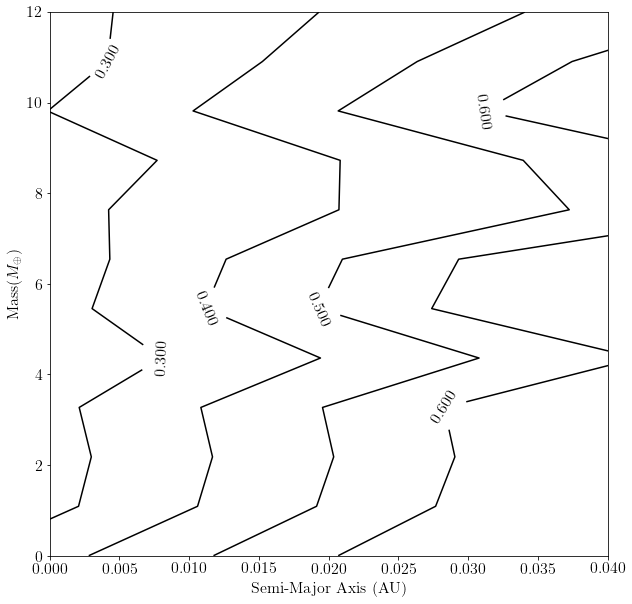

In [11]:
# now lets do eq_only analysis
merged_data_eqtide = final_data_eqonly[np.where(final_data_eqonly['bMerge_eqtide'] == 1)]
n_merged_eqtide = len(merged_data_eqtide)
n_comp_eqtide = len(final_data_eqonly[np.where(final_data_eqonly['bMerge_eqtide'] != -9999)])
print(n_merged_eqtide)
print(n_comp_eqtide)
# x = semi; y = mass; z = ecc
semib_eqonly = merged_data_eqtide['semi_b_0'] # x 
massb_eqonly = merged_data_eqtide['mass_b_0'] # y 
eccb_eqonly = merged_data_eqtide['ecc_b_0'] # z
levels=[0.1,0.2,0.3,0.4,0.5,0.6]
#pdb.set_trace()
make_contour(semib_eqonly,massb_eqonly,eccb_eqonly,
            y_binwidth=1.0,x_binwidth=0.025,xlim=(0,0.04), levels=levels,
            names='EqOnly');

1494


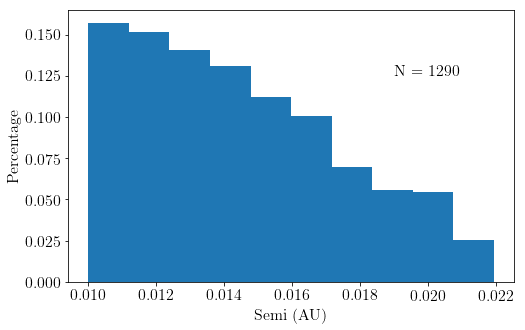

In [12]:
# lets make histogram of eq_only merged cases and their semis


print(len(semib_eqonly))
# 80% have merged with semis less than 0.022 AU; lets filter all the others out
p025semi_mask = np.where(semib_eqonly <= 0.022)
masked_semi_eqonly = semib_eqonly[p025semi_mask]
n = masked_semi_eqonly.shape[0]
fig,ax = plt.subplots(1,1)
fig.set_size_inches(8,5)
bins = 10
ax.hist(masked_semi_eqonly,bins=bins, weights=np.zeros_like(masked_semi_eqonly)+1./masked_semi_eqonly.size)
ax.text(0.019,0.125, 'N = %i'%(n))
ax.set_xlabel('Semi (AU)')
ax.set_ylabel('Percentage')
#ax.set_title('Inner Planet Merged');
fig.savefig("./figs/eqtide_merge.png", bbox_inches='tight',dpi=plot_dpi)

2134
24927
Shaping Contour Data...
Making Eccentricty Plot


/home/dm1681/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/dm1681/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


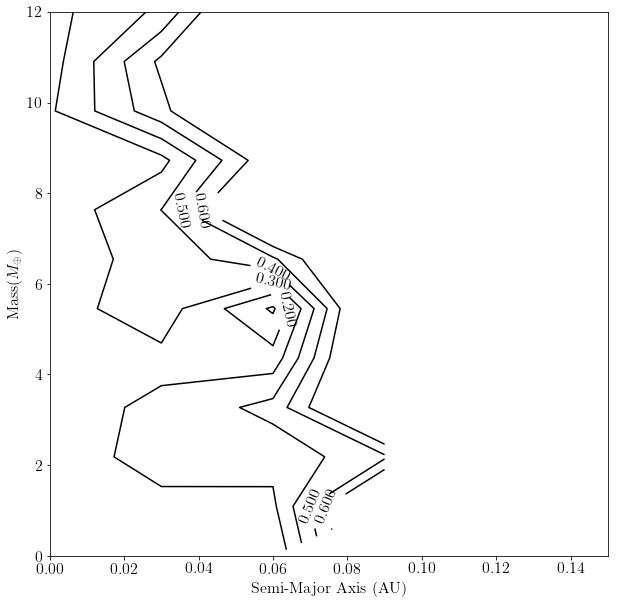

In [13]:
merged_data_eqorb = final_data_eqorb[np.where(final_data_eqorb['bMerge_eqorb'] == 1)]
n_merged_eqorb = len(merged_data_eqorb)
n_comp_eqorb = len(final_data_eqorb[np.where(final_data_eqorb['bMerge_eqorb'] != -9999)])
print(n_merged_eqorb)
print(n_comp_eqorb)
massb_eqorb = merged_data_eqorb['mass_b_0']
semib_eqorb = merged_data_eqorb['semi_b_0']
eccb_eqorb = merged_data_eqorb['ecc_b_0']

eqorb_contour = make_contour(semib_eqorb, massb_eqorb, eccb_eqorb, 
                             y_binwidth=1, ylim = (0,12),
                             x_binwidth=0.025, xlim=(0,0.15), names='EqOrb')

In [14]:
# now lets filter out the ones that didnt complete...
completed_eqorb_data = final_data_eqorb[np.where(final_data_eqorb['bMerge_eqorb'] != -9999)]

# find the ones that merged with the addition of a planet
distorb_caused_merge = completed_eqorb_data[np.where(completed_eqorb_data['bMerge_eqorb'] == 1)]
distorb_caused_merge = distorb_caused_merge[np.where(distorb_caused_merge['bMerge_eqtide'] == 0)]
distorb_caused_merge

Dirs,mass_b_0,mass_c_0,semi_b_0,semi_c_0,ecc_b_0,ecc_c_0,strength,bMerge_eqtide,bMerge_eqorb
str29,float64,float64,float64,float64,float64,float64,float64,float64,float64
./final_data/runs_eqorb/17890,2.19446504121,3.29960842688,0.0207949815127,0.0807949815127,0.0227509524735,0.551812611716,4.116599731859826,0.0,1.0
./final_data/runs_eqorb/22613,1.49972865972,9.61459368335,0.0195080474861,0.0695080474861,0.348212805112,0.317334551076,5.804801063398252,0.0,1.0
./final_data/runs_eqorb/00235,4.84468828884,8.95035519471,0.0197893767503,0.0497893767503,0.00319661155018,0.268379598255,2.674823462026927,0.0,1.0
./final_data/runs_eqorb/00119,11.1692491613,9.5604827719,0.0261389521746,0.0861389521746,0.146311323785,0.479524690558,5.88354524346397,0.0,1.0
./final_data/runs_eqorb/16874,2.56907369588,10.6372711071,0.0135391106874,0.0435391106874,0.528212418214,0.188617702474,5.965342376951665,0.0,1.0
./final_data/runs_eqorb/13943,1.36212504348,10.8771190771,0.0160799412267,0.0360799412267,0.0137177374921,0.114699355198,1.266226461819413,0.0,1.0
./final_data/runs_eqorb/08933,0.896574745705,3.68783177507,0.0269715679113,0.146971567911,0.318928016577,0.544152403161,7.262996025770326,0.0,1.0
./final_data/runs_eqorb/05873,3.60196762553,9.27212480608,0.0244321360994,0.0544321360994,0.0917982076771,0.192827392016,0.9565592221928645,0.0,1.0
./final_data/runs_eqorb/08563,1.81705183765,7.29986693546,0.0254841100834,0.0654841100834,0.0177426847008,0.259033445127,1.285758392047538,0.0,1.0


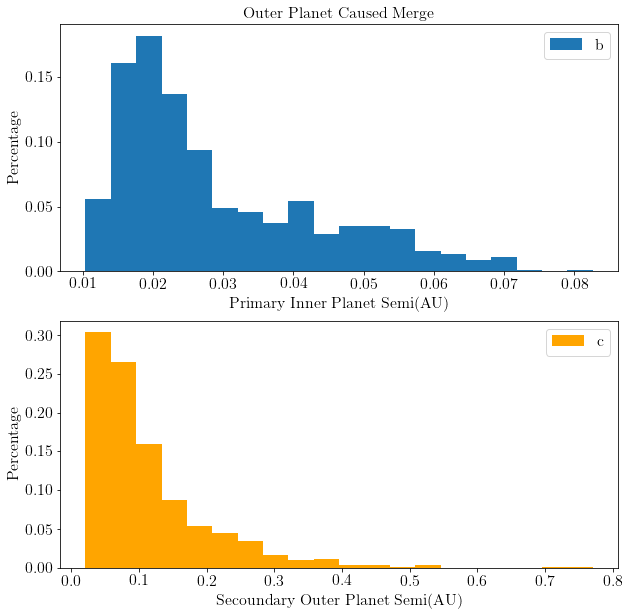

In [15]:
def make_eqorb_merge_eq_nomerge_hist(orb_merge_eq_nomerge_data, bins = 20):
    # we want to make a histogram of semi_b
    semi_b = orb_merge_eq_nomerge_data['semi_b_0']
    semi_c = orb_merge_eq_nomerge_data['semi_c_0']
    
    fig,ax = plt.subplots(2,1)
    fig.set_size_inches(10,10)
    ax[0].hist(semi_b, bins=bins, weights = np.zeros_like(semi_b)+1./semi_b.size, label='b')
    ax[0].set_xlabel("Primary Inner Planet Semi(AU)", fontsize=16)
    ax[0].set_ylabel("Percentage", fontsize=16)
    ax[0].set_title("Outer Planet Caused Merge", fontsize=16)
    ax[0].legend(loc=0)
    
    ax[1].hist(semi_c, bins=bins, weights = np.zeros_like(semi_c)+1./semi_c.size, color='orange', label='c')
    ax[1].set_xlabel("Outer Semi(Au)", fontsize=16)
    ax[1].set_ylabel("Percentage", fontsize=16)
    ax[1].set(xlabel="Secoundary Outer Planet Semi(AU)", ylabel="Percentage")
    ax[1].legend(loc=0)
    fig.savefig("./figs/outer_planet_merge.png", bbox_inches='tight',dpi=plot_dpi)
    
make_eqorb_merge_eq_nomerge_hist(distorb_caused_merge)

In [16]:
# the addition of an outer planet can extend the distance at which the inner planet can merge. 
# cool!!

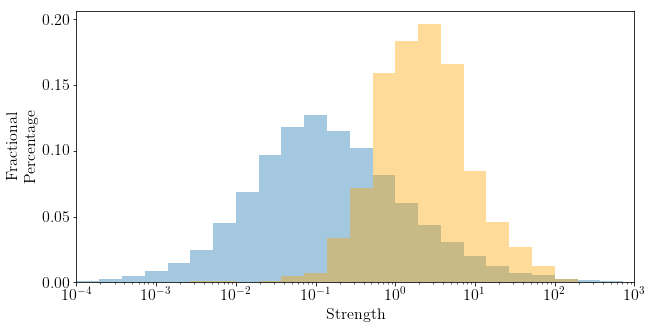

In [17]:
strength_data = final_data_eqorb['strength']
fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,5)
#x_bins = np.logspace(4,16,50)
x_bins = np.logspace(-6, 8, 50)
hist_data = ax.hist(strength_data, x_bins, weights=np.zeros_like(strength_data)+1./strength_data.size, alpha=0.4, label='all cases')

orange = ax.hist(distorb_caused_merge['strength'],x_bins,color='orange', alpha=0.4,
                    weights=np.zeros_like(distorb_caused_merge['strength'])+1./distorb_caused_merge['strength'].size,
                label='C caused Merge')
ax.set_xscale('log')
ax.set_xlim(1e-4,1e3)
ax.set_xlabel('Strength', fontsize=16)
ax.set_ylabel('Fractional\nPercentage', fontsize=16)
fig.savefig('./figs/strength_hist.png', bbox_inches='tight', dpi=300)
#orb_merge_eq_nomerge_data[:,-3].astype(np.float64)




In [18]:
# cite murray and dermott that disturbing function scales with with e proportional to this function.
# can normalize strength?

1736
14944
Shaping Contour Data...
Making Eccentricty Plot


/home/dm1681/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/dm1681/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


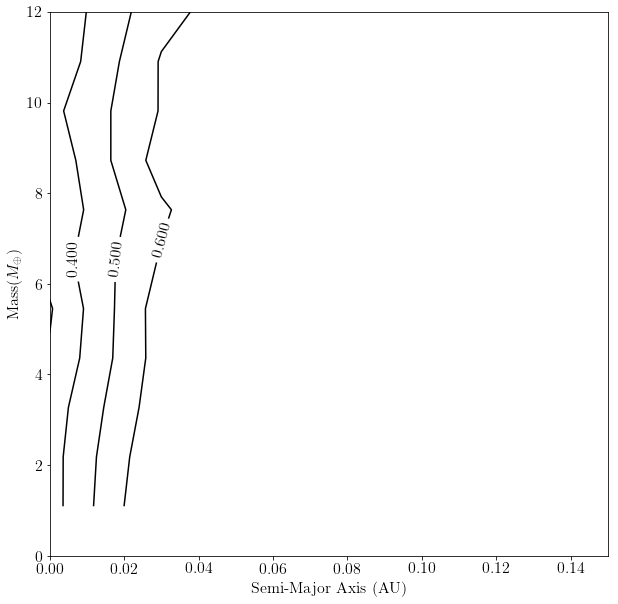

In [19]:
# now lets analyze the eqtide+atmesc cases
merged_data_eqmesc = final_data_eqmesc[np.where(final_data_eqmesc['bMerge_eqmesc'] == 1)]
n_merged_eqmesc = len(merged_data_eqmesc)
n_comp_eqmesc = len(final_data_eqmesc[np.where(final_data_eqmesc['bMerge_eqmesc'] != -9999)])
print(n_merged_eqmesc)
print(n_comp_eqmesc)
x_data = merged_data_eqmesc['semi_b_0']
y_data = merged_data_eqmesc['mass_b_0']
z_data = merged_data_eqmesc['ecc_b_0']

levels=[0.1,0.2,0.3,0.4,0.5,0.6]

make_contour(x_data, y_data, z_data, y_binwidth=1, ylim = (0,12), levels=levels,
             x_binwidth=0.025, xlim=(0,0.15), names='EqMesc');

In [20]:
# now lets filter out the ones that didnt complete...
completed_eqmesc_data = final_data_eqmesc[np.where(final_data_eqmesc['bMerge_eqmesc'] != -9999)]

# find the ones that merged with the addition of a planet
atmesc_caused_merge = completed_eqmesc_data[np.where(completed_eqmesc_data['bMerge_eqmesc'] == 0)]
atmesc_caused_merge = atmesc_caused_merge[np.where(atmesc_caused_merge['bMerge_eqtide'] == 1)]
atmesc_caused_merge

Dirs,mass_b_0,semi_b_0,ecc_b_0,bMerge_eqtide,bMerge_eqmesc
str30,float64,float64,float64,float64,float64
./final_data/runs_eqmesc/24372,2.73604533581,0.014824136035,0.128813909987,1.0,0.0
./final_data/runs_eqmesc/07352,3.05901584344,0.0187213591379,0.0348694276481,1.0,0.0
./final_data/runs_eqmesc/12258,3.54113341896,0.0194713948324,0.172404231197,1.0,0.0
./final_data/runs_eqmesc/00976,2.02477831228,0.0180173982163,0.022951181926,1.0,0.0
./final_data/runs_eqmesc/13860,1.8456371738,0.0153568734461,0.0297187972682,1.0,0.0
./final_data/runs_eqmesc/09384,2.3348071659,0.0203759395862,0.143908225658,1.0,0.0
./final_data/runs_eqmesc/08635,9.92301738646,0.0233515167349,0.0753286098401,1.0,0.0
./final_data/runs_eqmesc/03890,11.180110496,0.0295242787183,0.245092188204,1.0,0.0
./final_data/runs_eqmesc/03788,6.35322739253,0.0225228464288,0.191227426592,1.0,0.0


2698
20256
Shaping Contour Data...
Making Eccentricty Plot


/home/dm1681/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/dm1681/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


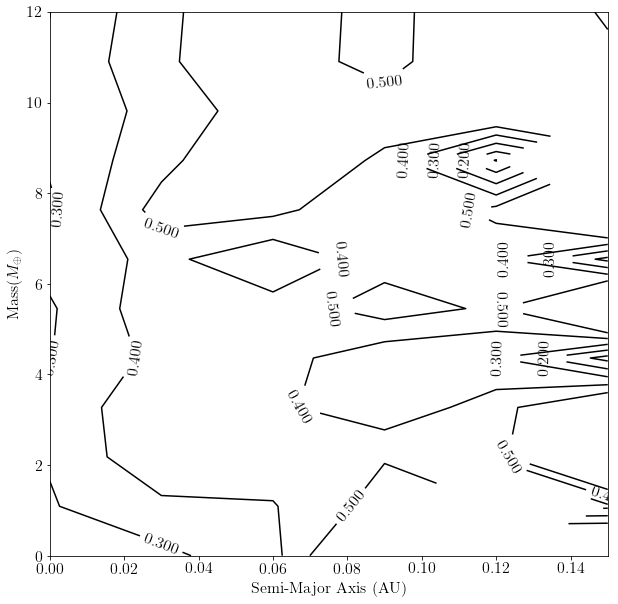

In [21]:
merged_data_eqorbmesc = final_data_eqorbmesc[np.where(final_data_eqorbmesc['bMerge_eqorbmesc'] == 1)]
n_merged_eqorbmesc = len(merged_data_eqorbmesc)
n_comp_eqorbmesc = len(final_data_eqorbmesc[np.where(final_data_eqorbmesc['bMerge_eqorbmesc'] != -9999)])
print(n_merged_eqorbmesc)
print(n_comp_eqorbmesc)
x_data = merged_data_eqorbmesc['semi_b_0']
y_data = merged_data_eqorbmesc['mass_b_0']
z_data = merged_data_eqorbmesc['ecc_b_0']

levels = [0.1,0.2,0.3,0.4,0.5]
make_contour(x_data, y_data, z_data, y_binwidth=1, ylim = (0,12),
             x_binwidth=0.025, xlim=(0,0.15), names='EqOrbMesc',
             levels=levels);

In [ ]:
merged_data_eqorb

In [ ]:
# make histogram below
# planets that lost envelopes
# send rory the hill stab case

In [ ]:
# lets find the sims that are said to be hillstable, but shouldnt be

fake_hillstab_sims = np.array([13380,10282,369,20941,7058,5404,2793,5556,6203,16812])

for sim_num in fake_hillstab_sims:
    sim_name = "%05i"%sim_num
    # lets read in b and c. 
    b_file = open("./final_data/runs_eqorb/"+sim_name+"/b.in",'r')
    c_file = open("./final_data/runs_eqorb/"+sim_name+"/c.in",'r')
    b_content = b_file.readlines()
    c_content = c_file.readlines()
    # what do we need to read in?
    
    
    
    
    
    

In [ ]:
# case that lost a lot of atmosphere, compare eqtide+atmesc w/ eqtide orbital params. 
# run atmesc cases. 

#mardling and lin 2004; raymond 2006 (some destruction), 

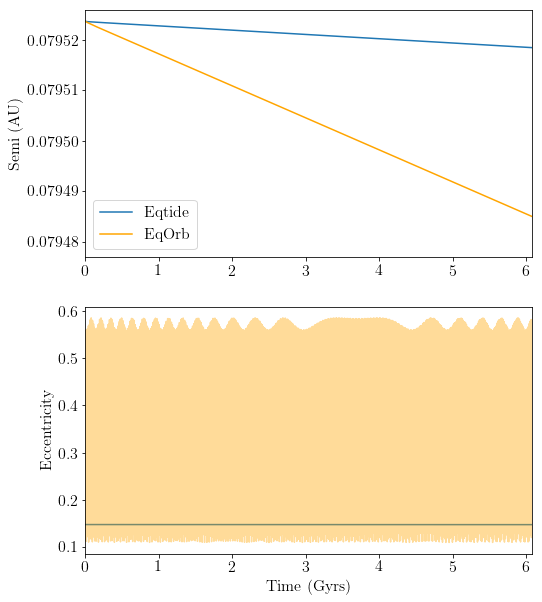

In [31]:
eqtide_fwd_data = np.loadtxt('./final_data/char/eqtide/system.b.forward', dtype=np.float64)
time_eqtide = eqtide_fwd_data[:,0]
semi_eqtide = eqtide_fwd_data[:,1]
ecc_eqtide = eqtide_fwd_data[:,2]

eqorb_fwd_data = np.loadtxt('./final_data/char/eqorb/system.b.forward', dtype=np.float64)
time_eqorb = eqorb_fwd_data[:,0]
semi_eqorb = eqorb_fwd_data[:,1]
ecc_eqorb = eqorb_fwd_data[:,2]
#pdb.set_trace()

eqmesc_fwd_data = np.loadtxt('./final_data/char/eqmesc/system.b.forward', dtype=np.float64)
time_eqmesc = eqmesc_fwd_data[:,0]
semi_eqmesc = eqmesc_fwd_data[:,1]
ecc_eqmesc = eqmesc_fwd_data[:,2]
envmass_eqmesc = eqmesc_fwd_data[:,-3]

eqorbmesc_fwd_data = np.loadtxt('./final_data/char/eqorbmesc/system.b.forward', dtype=np.float64)
time_eqorbmesc = eqorbmesc_fwd_data[:,0]
semi_eqorbmesc = eqorbmesc_fwd_data[:,1]
ecc_eqorbmesc = eqorbmesc_fwd_data[:,2]
envmass_eqorbmesc = eqorbmesc_fwd_data[:,-3]

fig,ax = plt.subplots(2,1)
fig.set_size_inches(8,10)
ax[0].plot(time_eqtide/1e9, semi_eqtide, label='Eqtide')
ax[0].plot(time_eqorb/1e9, semi_eqorb, color='orange', label='EqOrb')
ax[0].set_ylabel('Semi (AU)', fontsize=16)

ax[0].set_xlim(0,max(time_eqmesc/1e9))
ax[0].legend(loc=0, fontsize=16)


ax[1].plot(time_eqtide/1e9, ecc_eqtide)
ax[1].plot(time_eqorb/1e9, ecc_eqorb, color='orange', alpha = 0.4)
ax[1].set_xlim(0,max(time_eqmesc/1e9))
ax[1].set_ylabel('Eccentricity', fontsize=16)
ax[1].set_xlabel('Time (Gyrs)', fontsize=16);

fig.savefig('./figs/char_cases_eqtide_eqorb.png', bbox_inches='tight', dpi=plot_dpi)




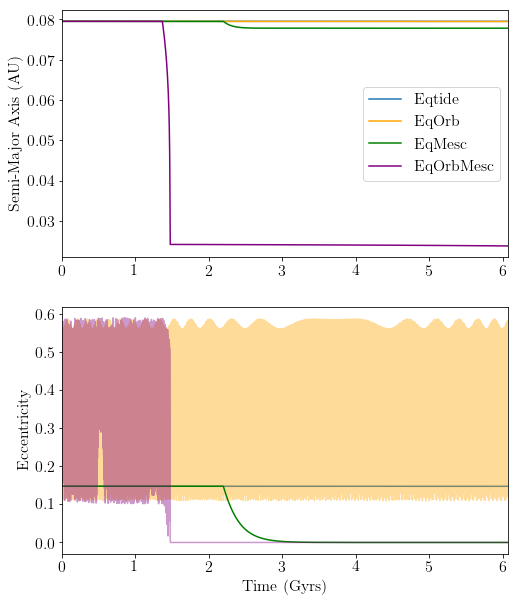

In [32]:
# lets find a characteristic case for eqtide only, showing the evolution of semi and ecc.


fig,ax = plt.subplots(2,1)
fig.set_size_inches(8,10)
ax[0].plot(time_eqtide/1e9, semi_eqtide, label='Eqtide')
ax[0].plot(time_eqorb/1e9, semi_eqorb, color='orange', label='EqOrb')
ax[0].plot(time_eqmesc/1e9, semi_eqmesc, color='green', label='EqMesc')
ax[0].plot(time_eqorbmesc/1e9, semi_eqorbmesc, color='purple',label='EqOrbMesc')
ax[0].set_ylabel('Semi-Major Axis (AU)', fontsize=16)
ax[0].set_xlim(0,max(time_eqmesc/1e9))
ax[0].legend(loc=0, fontsize=16)


ax[1].plot(time_eqtide/1e9, ecc_eqtide)
ax[1].plot(time_eqorb/1e9, ecc_eqorb, color='orange', alpha = 0.4)
ax[1].plot(time_eqmesc/1e9, ecc_eqmesc, color='green')
ax[1].plot(time_eqorbmesc/1e9, ecc_eqorbmesc, color='purple', alpha = 0.4)
ax[1].set_xlim(0,max(time_eqmesc/1e9))
ax[1].set_ylabel('Eccentricity', fontsize=16)
ax[1].set_xlabel('Time (Gyrs)', fontsize=16);

fig.savefig('./figs/char_cases.png', bbox_inches='tight', dpi=plot_dpi)

Text(0.5,0,'Time (yrs)')

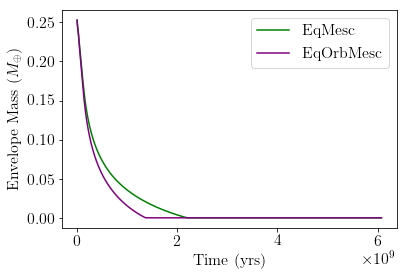

In [24]:
fig,ax = plt.subplots(1,1)

ax.plot(time_eqmesc, envmass_eqmesc, color='green', label='EqMesc')
ax.plot(time_eqorbmesc, envmass_eqorbmesc, color='purple', label='EqOrbMesc')
ax.legend(loc=0)
ax.set_ylabel('Envelope Mass ($M_\oplus$)',fontsize=16)
ax.set_xlabel('Time (yrs)',fontsize=16)






In [ ]:
char_runs = './final_data/char/eqorbmesc'
#longp - longa = argp

# at 1.533e+09
# b_inputs
mass_b = 11.187142
semi_b = 0.024181
ecc_b = 0.0000
longp_b = 150.48573
incl_b = 11.792885
longa_b = 236.625886
argp_b = longp_b - longa_b
print("b: ",argp_b+360)

# c_inputs
mass_c = 6.86527461963
rad_c = 1.68792324516
semi_c = 0.289524
ecc_c = 8.694680e-13
longp_c = 154.969469
incl_c = 2.989354
longa_c = 36.933234
argp_c = longp_c - longa_c
print('c: ',argp_c)









In [34]:
#b_fwd = np.loadtxt('./final_data/char/eqorbmesc/snapshot/binvplane_0/system.b.forward')
#c_fwd = np.loadtxt('./final_data/char/eqorbmesc/snapshot/binvplane_0/system.c.forward')

#b_fwd = np.loadtxt('./final_data/char/eqorbmesc/snapshot/binvplane_1/system.b.forward')
#c_fwd = np.loadtxt('./final_data/char/eqorbmesc/snapshot/binvplane_1/system.c.forward')

b_fwd = np.loadtxt('./final_data/char/eqorbmesc/snapshot/1470000000.0/system.b.forward',usecols=(0,2))
c_fwd = np.loadtxt('./final_data/char/eqorbmesc/snapshot/1470000000.0/system.c.forward',usecols=(0,2))

In [ ]:
b_ecc = b_fwd[:,1]
b_time = b_fwd[:,0]
c_ecc = c_fwd[:,1]
c_time = c_fwd[:,0]

fig,ax = plt.subplots(1,2)
fig.set_size_inches(16,5)

ax[0].plot(b_time/1e6, b_ecc, label='b', ls = '--')
ax[0].plot(c_time/1e6, c_ecc, label='c', color='orange', ls=':')
ax[0].set_xlabel('Time (Gyrs)', fontsize=18)
ax[0].set_ylabel('Ecc', fontsize=18)

ax[1].plot(b_time/1e6, b_ecc, label='b')
ax[1].plot(c_time/1e6, c_ecc, label='c')
ax[1].set_xlim(21,23)
ax[1].set_ylim(0,0.002)
ax[1].set_xlabel('Time (Gyrs)', fontsize=18)
ax[1].set

fig.savefig('./figs/ecc_evol_147gyrs_together.png', bbox_inches='tight', dpi=plot_dpi)

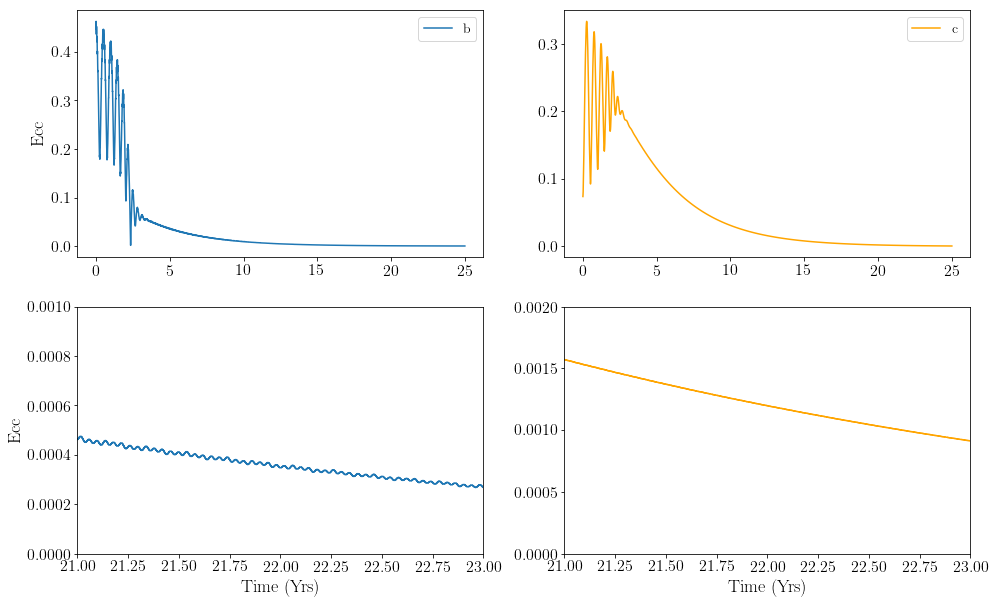

In [25]:
# lets look at the snapshot


b_ecc = b_fwd[:,1]
b_time = b_fwd[:,0]
c_ecc = c_fwd[:,1]
c_time = c_fwd[:,0]

fig,ax = plt.subplots(2,2)
fig.set_size_inches(16,10)
ax[0,0].plot(b_time/1e6, b_ecc, label='b')
ax[0,1].plot(c_time/1e6, c_ecc, color='orange', label='c')
ax[1,0].set_xlabel('Time (Gyrs)',fontsize=18)
ax[0,0].set_ylabel('Ecc', fontsize=18)
ax[1,0].set_ylabel('Ecc', fontsize=18)

ax[1,1].set_xlabel('Time (Yrs)',fontsize=18)

ax[0,1].legend(loc=0, fontsize=14)
ax[0,0].legend(loc=0, fontsize=14)

ax[1,0].plot(b_time/1e6, b_ecc, label='b')
ax[1,0].set_xlim(21, 23)
ax[1,0].set_ylim(0,0.001)
ax[1,1].plot(c_time/1e6, c_ecc, color='orange', label='c')
ax[1,1].set_xlim(21, 23)
ax[1,1].set_ylim(0,0.002)
fig.savefig('figs/Ecc_evol_147gyrs.png', bbox_inches='tight', dpi=plot_dpi)

In [ ]:
# this script will create initial conditions for distorb and eqtide based on the outputs from any given time in the 
# forward files. 

def create_ICs(time, duration, outputtime, dest_dir='./final_data/char/eqorbmesc/snapshot/'):
    b_fwd = np.loadtxt('./final_data/char/eqorbmesc/system.b.forward')
    c_fwd = np.loadtxt('./final_data/char/eqorbmesc/system.c.forward')
    
    # lets get the data accoring to the time specified in the argument
    for line_b, line_c in zip(b_fwd, c_fwd):
        if ((line_b[0] == time) and (line_c[0] == time)):
            semi_b = np.float64(line_b[1])
            ecc_b = np.float64(line_b[2])
            longp_b = np.float64(line_b[5])
            incl_b = np.float64(line_b[6])
            longa_b = np.float64(line_b[7])
            mass_b = np.float64(line_b[8])
            argp_b = longp_b - longa_b
            if argp_b > 360:
                argp_b = argp_b - 360
            elif argp_b < 0:
                argp_b = argp_b + 360
            
            semi_c = np.float64(line_c[1])
            ecc_c = np.float64(line_c[2])
            longp_c = np.float64(line_c[3])
            incl_c = np.float64(line_c[4])
            longa_c = np.float64(line_c[5])
            mass_c = 6.86527461963
            argp_c = longp_c - longa_c
            if argp_c > 360:
                argp_c = argp_c - 360
            elif argp_c < 0:
                argp_c = argp_c + 360
    # now that we have the data, lets write to file.
    # they already exist at:
    # so lets copy it over to dest_dir
    snapshot_dir = './final_data/char/eqorbmesc/snapshot/'
    dest_dir = dest_dir + str(time) + '/'
    if os.path.isdir(dest_dir) == False:
        os.mkdir(dest_dir)
    shutil.copyfile(snapshot_dir+'b.in',dest_dir+'b.in')
    shutil.copyfile(snapshot_dir+'c.in',dest_dir+'c.in')
    shutil.copyfile(snapshot_dir+'star.in',dest_dir+'star.in')
    shutil.copyfile(snapshot_dir+'vpl.in',dest_dir+'vpl.in')
    
    b_file = open(snapshot_dir+'b.in','r')
    b_content = b_file.readlines()
    b_file.close()

    oldmass_b = b_content[4].split('\t\t')[1][:-1]
    b_content[4] = b_content[4].replace(oldmass_b,str(mass_b*-1))
    
    oldecc_b = b_content[9].split('\t\t')[1][:-1]
    b_content[9] = b_content[9].replace(oldecc_b, str(ecc_b))
    
    oldsemi_b = b_content[10].split('\t\t')[1][:-1]
    b_content[10] = b_content[10].replace(oldsemi_b, str(semi_b))
    
    oldincl_b = b_content[12].split('\t\t')[1][:-1]
    b_content[12] = b_content[12].replace(oldincl_b, str(incl_b))
    
    oldlonga_b = b_content[13].split('\t\t')[1][:-1]
    b_content[13] = b_content[13].replace(oldlonga_b, str(longa_b))
    
    oldargp_b = b_content[14].split('\t\t')[1][:-1]
    b_content[14] = b_content[14].replace(oldargp_b, str(argp_b))
    
    b_new_content = ''.join(b_content)
    
    b_new = open(dest_dir+'b.in','w')
    b_new.write(b_new_content)
    b_new.close()
    
    c_file = open(snapshot_dir+'c.in','r')
    c_content = c_file.readlines()
    c_file.close()


    oldmass_c = c_content[4].split('\t\t')[1][:-1]
    c_content[4] = c_content[4].replace(oldmass_c,str(mass_c*-1))
    
    oldecc_c = c_content[9].split('\t\t')[1][:-1]
    c_content[9] = c_content[9].replace(oldecc_c, str(ecc_c))
    
    oldsemi_c = c_content[10].split('\t\t')[1][:-1]
    c_content[10] = c_content[10].replace(oldsemi_c, str(semi_c))
    
    oldincl_c = c_content[12].split('\t\t')[1][:-1]
    c_content[12] = c_content[12].replace(oldincl_c, str(incl_c))
    
    oldlonga_c = c_content[13].split('\t\t')[1][:-1]
    c_content[13] = c_content[13].replace(oldlonga_c, str(longa_c))
    
    oldargp_c = c_content[14].split('\t\t')[1][:-1]
    c_content[14] = c_content[14].replace(oldargp_c, str(argp_c))

    c_new_content = ''.join(c_content)
    
    c_new = open(dest_dir+'c.in','w')
    c_new.write(c_new_content)
    c_new.close()
    
    vpl_file = open(snapshot_dir+'vpl.in','r')
    vpl_content = vpl_file.readlines()
    vpl_file.close()
    
    oldoutput_time = vpl_content[-1].split('\t')[1][:-1]
    vpl_content[-1] = vpl_content[-1].replace(oldoutput_time,str(outputtime))
    
    oldstop_time = vpl_content[-2].split('\t')[1][:-1]
    vpl_content[-2] = vpl_content[-2].replace(oldstop_time,str(duration))
    #pdb.set_trace()
    
    new_vpl_content = ''.join(vpl_content)
    vpl_new = open(dest_dir+'vpl.in','w')
    vpl_new.write(new_vpl_content)
    vpl_new.close()
    
    

    
        
            
            
create_ICs(1.470e09,25e6,1)    

In [ ]:
# larger outer mass planet more likely causing stronger strength, stronger ecc oscillations, faster damping in a_b


In [24]:
weighted_merges_eqtide = n_merged_eqtide / n_comp_eqtide
weighted_merges_eqorb = n_merged_eqorb / n_comp_eqorb
weighted_merges_eqmesc = n_merged_eqmesc / n_comp_eqmesc
weighted_merges_eqorbmesc = n_merged_eqorbmesc / n_comp_eqorbmesc

print("Eqtide:\t\t\t", weighted_merges_eqtide)
print("EqOrb:\t\t\t", weighted_merges_eqorb)
print("EqMesc:\t\t\t", weighted_merges_eqmesc)
print("EqOrbMesc:\t\t", weighted_merges_eqorbmesc, '\n')
print("EqOrb/Eqtide:\t\t", weighted_merges_eqorb/weighted_merges_eqtide)
print("EqMesc/Eqtide:\t\t",weighted_merges_eqmesc/weighted_merges_eqtide)
print("EqOrbMesc/Eqtide:\t",weighted_merges_eqorbmesc/weighted_merges_eqtide)

Eqtide:			 0.05976
EqOrb:			 0.08560998114494324
EqMesc:			 0.11616702355460386
EqOrbMesc:		 0.133195102685624 

EqOrb/Eqtide:		 1.4325632721710715
EqMesc/Eqtide:		 1.9438926297624475
EqOrbMesc/Eqtide:	 2.2288337129455154


In [40]:
8.561 - 5.976

2.585

In [43]:
13.32 - 5.976

7.344